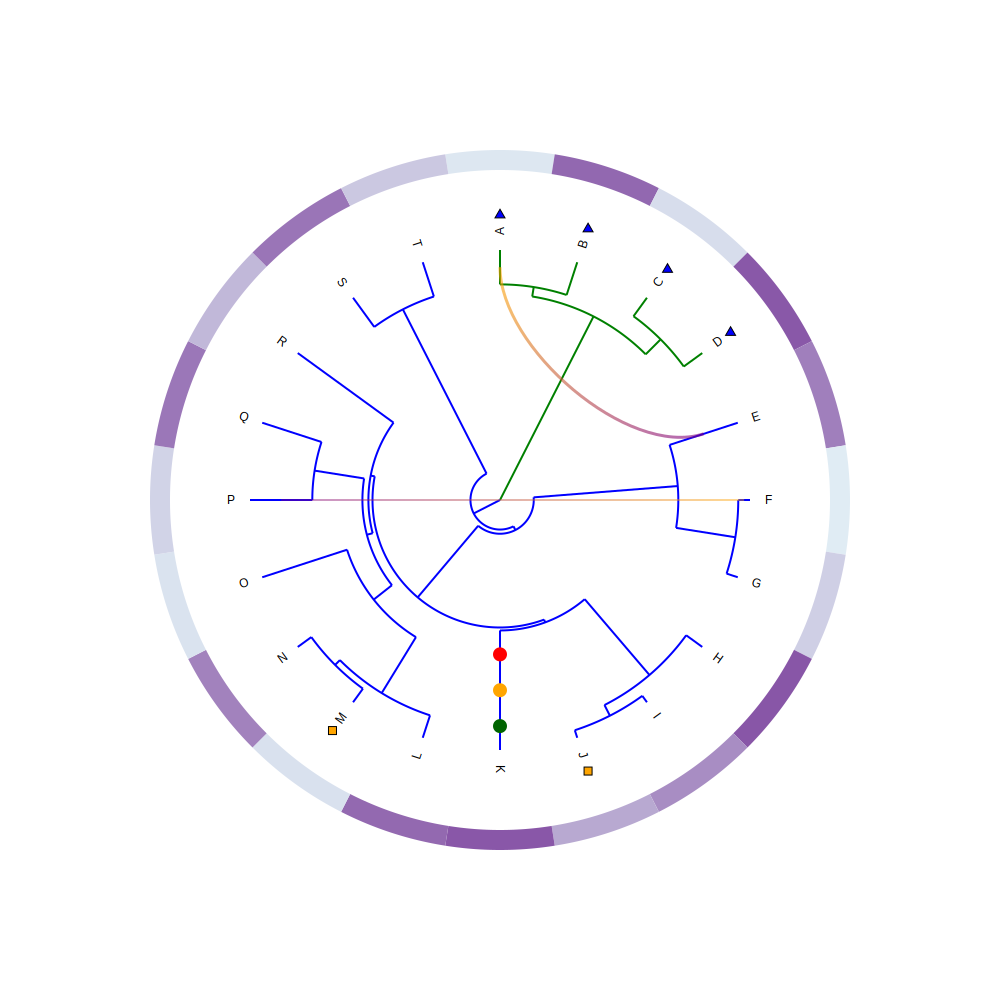

In [8]:
# Cell 1: Imports
import phylustrator as ph
import ete3

# Cell 2: Load Tree and Define Style
with open("../examples/data/basic/tree.nwk") as f:
    t = ete3.Tree(f.readline())
    
# Radial styles use 'radius' and 'degrees' instead of width/height
my_style = ph.TreeStyle(
    radius=250,        # Main radius of the tree
    degrees=360,       # Full circle (use 180 for half-circle)
    rotation=0,        # Rotate the whole tree
    leaf_size=0,
    node_size=0,
    branch_size=2,
    branch_color="black",
    font_size=12,
    font_family="Arial",
)

r = ph.RadialTreeDrawer(t, style=my_style)
r.add_leaf_names()
r.draw()
r.d

# Cell 3: Markdown
# # Decorating a Radial Tree

# Cell 4: Shapes, Rings, and Transfers
with open("../examples/data/basic/tree.nwk") as f:
    t = ete3.Tree(f.readline())
    
my_style = ph.TreeStyle(
    radius=250,
    degrees=360,
    leaf_size=0,
    node_size=0,
    branch_size=2,
    branch_color="black",
    font_size=12,
    font_family="Arial",
)

r = ph.RadialTreeDrawer(t, style=my_style)

# 1. Custom Branch Colors
target = t.get_common_ancestor("A", "D") 
node_colors = {n: "blue" for n in t.traverse()}
for n in target.traverse():
    node_colors[n] = "green"

r.draw(branch2color=node_colors)
r.add_leaf_names()


r.add_leaf_shapes(
    leaves=["A", "B", "C", "D"],
    shape="triangle",
    fill="blue",
    size=10,
    stroke="black",
    stroke_width=1,
    offset=35, 
    orient=True
)

r.add_leaf_shapes(
    leaves=["J", "M"],
    shape="square",
    fill="orange",
    size=8,
    stroke="black",
    stroke_width=1,
    offset=35,
    orient=True

)

events = [
    {"branch": "K", "where": 0.2, "shape": "circle",  "fill": "red",  "size": 14},
    {"branch": "K", "where": 0.5, "shape": "circle",  "fill": "orange","size": 14},
    {"branch": "K", "where": 0.8, "shape": "circle",  "fill": "darkgreen", "size": 14},
]
r.add_branch_shapes(events)

import random
heatmap_vals = {leaf.name: random.uniform(0, 1) for leaf in t.get_leaves()}

r.add_ring_heatmap(
    heatmap_vals,
    width=20,
    padding=80, # Push it out further than the previous ring
    low_color="#e0ecf4",
    high_color="#8856a7"
)

transfer_data = [
    {"from": "E", "to": "A", "freq": 1.0},
    {"from": "P", "to": "F", "freq": 0.5},
]

r.plot_transfers(
    transfer_data,
    curve_type="C",       
    stroke_width=3,
    opacity=0.6,
    gradient_colors=("purple", "orange"),
    arc_intensity=80 # Higher value = deeper arc towards center
)


r.d

In [ ]:
# Cell 5: Export
# SVG always works
r.save_svg("../examples/figures/radial_tree.svg")

# PNG requires cairosvg
r.save_png("../examples/figures/radial_tree.png", scale=3.0)